# Data Cleaning and Exploratory Data Analysis

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from janitor import clean_names

## Data Cleaning and Basic Attributes

In [77]:
raw_data = pd.read_csv('data/raw_data.csv')

In [78]:
# preview data
raw_data.head()

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Intake Date,Intake Condition,Intake Type,Intake Subtype,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,latitude,longitude,intake_is_dead,outcome_is_dead,was_outcome_alive,geopoint,intake_duration,is_current_month
0,A615796,*TALIA,CAT,BLACK,WHITE,Female,2018-04-06,2018-10-06,NORMAL,STRAY,OTC,NaN,2018-11-24,"1500 BLK TEMPLE AVE, LONG BEACH, CA 90804",LONG BEACH,TRANSFER,SPCALA,33.786316,-118.158948,Alive on Intake,False,1,"33.7863161, -118.1589477",49.0,0
1,A638666,SAM,DOG,RED,WHITE,Male,2018-01-17,2020-01-17,NORMAL,STRAY,OTC,NaN,2020-01-18,"1500 BLK TEMPLE AVE, LONG BEACH, CA 90804",LONG BEACH,RETURN TO OWNER,WALKIN,33.786316,-118.158948,Alive on Intake,False,1,"33.7863161, -118.1589477",1.0,0
2,A691756,*SNICKERDOODLE,DOG,BLACK,BROWN,Spayed,2022-01-12,2023-06-10,NORMAL,OWNER SURRENDER,FIELD,NaN,2023-07-01,"1500 BLK VUELTA GRANDE, LONG BEACH, CA 90815",LONG BEACH,ADOPTION,NaN,33.785933,-118.103039,Alive on Intake,False,1,"33.78593300000001, -118.1030391",21.0,0
3,A669649,*AMBUSH,DOG,CREAM,NaN,Neutered,2020-01-22,2022-03-09,NORMAL,RETURN,ADOPTION,NaN,2022-03-09,"1500 BLK W 19TH ST. LONG BEACH, CA 90810",LONG BEACH,ADOPTION,NaN,33.791683,-118.212197,Alive on Intake,False,1,"33.7916834, -118.2121968",0.0,0
4,A652817,HARLEY,DOG,BLACK,WHITE,Unknown,2018-01-01,2021-01-01,NORMAL,CONFISCATE,POLICE,NaN,2021-01-01,"1500 BLK W 23RD ST, LONG BEACH, CA 90810",LONG BEACH,RETURN TO OWNER,MICROCHIP,33.798951,-118.212194,Alive on Intake,False,1,"33.7989506, -118.2121945",0.0,0


In [79]:
# number of obs and columns/vars
raw_data.shape

(32931, 25)

In [80]:
# info on dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32931 entries, 0 to 32930
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Animal ID          32931 non-null  object 
 1   Animal Name        19417 non-null  object 
 2   Animal Type        32931 non-null  object 
 3   Primary Color      32931 non-null  object 
 4   Secondary Color    15535 non-null  object 
 5   Sex                32931 non-null  object 
 6   DOB                28758 non-null  object 
 7   Intake Date        32931 non-null  object 
 8   Intake Condition   32931 non-null  object 
 9   Intake Type        32931 non-null  object 
 10  Intake Subtype     32493 non-null  object 
 11  Reason for Intake  2134 non-null   object 
 12  Outcome Date       32620 non-null  object 
 13  Crossing           32931 non-null  object 
 14  Jurisdiction       32930 non-null  object 
 15  Outcome Type       32605 non-null  object 
 16  Outcome Subtype    292

In [81]:
# descriptive stats (with missing values)
raw_data.describe(include='all')

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Intake Date,Intake Condition,Intake Type,Intake Subtype,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,latitude,longitude,intake_is_dead,outcome_is_dead,was_outcome_alive,geopoint,intake_duration,is_current_month
count,32931,19417,32931,32931,15535,32931,28758,32931,32931,32931,32493,2134,32620,32931,32930,32605,29268,32931.000000,32931.000000,32931,32931,32931.000000,32931,32620.000000,32931.000000
unique,31787,9873,10,82,45,5,5938,3130,16,12,23,55,3114,17211,26,18,251,NaN,NaN,1,2,NaN,10453,NaN,NaN
top,A637086,*,CAT,BLACK,WHITE,Male,2018-04-10,2023-05-03,NORMAL,STRAY,OTC,OWNER PROB,2025-06-14,"7700 E SPRING ST, LONG BEACH, CA 90815",LONG BEACH,RESCUE,SPCALA,NaN,NaN,Alive on Intake,False,NaN,"33.8096122, -118.0826161",NaN,NaN
freq,8,92,15754,8307,9207,7365,47,72,14772,23131,17116,469,56,259,28382,7752,3841,NaN,NaN,32931,26124,NaN,523,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.814675,-118.150376,NaN,NaN,0.793295,NaN,19.052667,0.012572
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154676,0.500040,NaN,NaN,0.404948,NaN,48.272103,0.111418
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.297815,-122.695911,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.783990,-118.191074,NaN,NaN,1.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.806783,-118.173446,NaN,NaN,1.000000,NaN,5.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.850842,-118.129694,NaN,NaN,1.000000,NaN,17.000000,0.000000


In [82]:
# clean/rename columns
raw_data = clean_names(raw_data)

In [83]:
# save cleaned names for later use
column_names = raw_data.columns

In [84]:
# handle dtypes
raw_data['dob'] = pd.to_datetime(raw_data['dob'])
raw_data['intake_date'] = pd.to_datetime(raw_data['intake_date'])
raw_data['outcome_date'] = pd.to_datetime(raw_data['outcome_date'])

raw_data = raw_data.astype(
    {
        'animal_type': 'category',
        'primary_color': 'category',
        'secondary_color': 'category',
        'sex': 'category',
        'intake_condition': 'category',
        'intake_type': 'category',
        'intake_subtype': 'category',
        'reason_for_intake': 'category',
        'jurisdiction': 'category',
        'outcome_type': 'category',
        'outcome_subtype': 'category',
        'was_outcome_alive': 'bool',
    }
)

In [67]:
# percentage of missing values per column
for col in raw_data.columns:
    print('{0}: {1}'.format(col, (raw_data[col].isna().sum() / raw_data.shape[0])))

animal_id: 0.0
animal_name: 0.4103732045792718
animal_type: 0.0
primary_color: 0.0
secondary_color: 0.5282560505298959
sex: 0.0
dob: 0.12671950441832924
intake_date: 0.0
intake_condition: 0.0
intake_type: 0.0
intake_subtype: 0.013300537487473809
reason_for_intake: 0.9351978379034952
outcome_date: 0.009443988946585284
crossing: 0.0
jurisdiction: 3.036652394400413e-05
outcome_type: 0.009899486805745346
outcome_subtype: 0.11123257720688713
latitude: 0.0
longitude: 0.0
intake_is_dead: 0.0
outcome_is_dead: 0.0
was_outcome_alive: 0.0
geopoint: 0.0
intake_duration: 0.009443988946585284
is_current_month: 0.0


In [85]:
# number of unique animals
raw_data['animal_id'].nunique()

31787

In [89]:
# num of animals per type
raw_data['animal_type'].value_counts()

animal_type
CAT           15754
DOG           10408
BIRD           2396
OTHER          1643
WILD           1552
RABBIT          615
REPTILE         361
GUINEA PIG      188
LIVESTOCK        12
AMPHIBIAN         2
Name: count, dtype: int64

In [68]:
# drop unnecessary columns
raw_data = raw_data.drop(columns=['animal_name', 'is_current_month', 'secondary_color'])

## Visual EDA

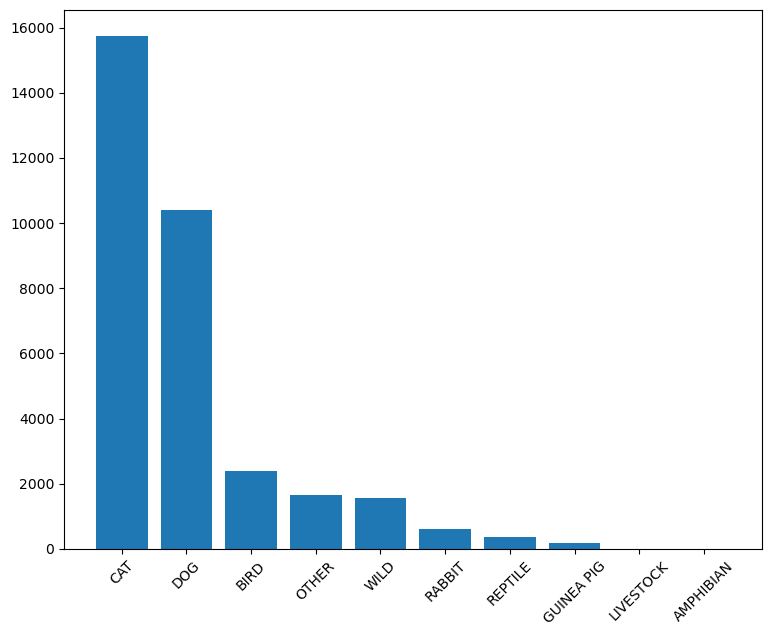

In [96]:
animal_type_count = raw_data['animal_type'].value_counts()

fig, ax = plt.subplots(figsize=(9, 7))
ax.bar(animal_type_count.index, animal_type_count)
ax.tick_params('x', rotation=45)
plt.show()

<Axes: xlabel='animal_type', ylabel='Count'>

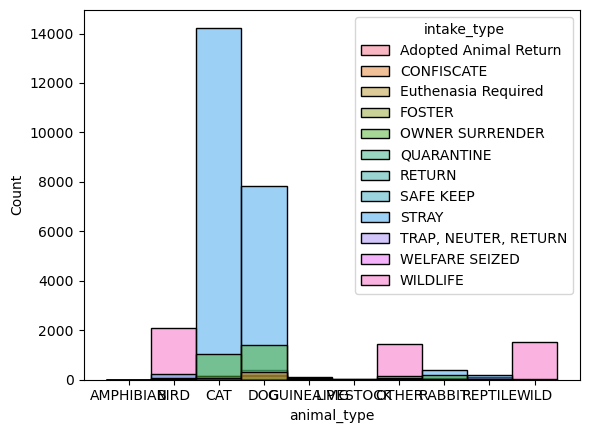

In [98]:
sns.histplot(data=raw_data, x='animal_type', hue='intake_type', discrete=True)